## Backstory: 


For the first time, I went on a 7 thousand mile trip to Taiwan for a 2-week Engineering program at Northwestern. Initially, I had plans to go back as a group with the rest of the students, but I ended up rescheduling to visit family members before I start with my intership. Having started with 2100 dollars as a round trip from the US to Taiwan, the options I found when resceduling were 2000 dollars for a one-way trip back to the US. Of course, I didn't end up booking that flight - I found another one that leaves a little later than I wanted to but was cheaper, and booked it. However, the prices I was confronted with made me wonder whether the airline industry is actually soaring with prices like that, and whether it's always been like that or is just a recent increase in prices. I also was wondering whether such high prices were a result of the summer season or or were just the result of my flight being international. With those questions, it took me a couple datasets and some pandas to find out the answer.

![image](https://news.mit.edu/sites/default/files/images/202101/MIT-Aircraft-Nox-01.jpg)

## Acquiring data

To aid my analysis, I looked for datasets that would have accurate records of the prices for multiple years back. I ended up with the [Bureau of Transportation Statistics](https://www.bts.gov/air-fares), where I found the records of all average annual airfare for the last 29 years (prices from 1995 until now). 

**These are some points that need to be considered about the features of the values in the dataset and how we could utilize them in the correct context:**

- The dataset explores US internal flights only: our main question was about airfare in general but we were interested in finding out about the international prices as well. We'll go ahead with the national flights first and investigate if there are any trends that could be parallelly drawn to the international airline industry (will have to do some research about potential similarities and differences)
- The airfare is an average of the annual value: this average was deducted using only 10% of all US national flights in a single year. There is a possibility that this 10% was concentrated in a certain region of the United States, or that a certain airline was the heavy focus. The Bureau doesn't provide more details on how the annual airfare values were obtained. However, differences between certain years are likely to be much bigger than regional differences of prices within a certain year. Therefore, we need to lay down the assumptions but we recognize that this isn't a significant limitation to the utility of the dataset. 
- There are values that are inflation-adjusted, and values that are not inflation-adjusted. Depending on the analysis, either of these could be used (in this project, we use the inflation-adjusted values to look at the price trend over the years, but use the non-inflation-adjusted ones to compare the prices with GDP values for each of the years). You could use these links to explore how inflation is calaucated for a single year [How To Calculate Inflation-Adjusted Prices](https://www.thestreet.com/personal-finance/how-to-calculate-inflation-adjusted-prices) 
- Prices included in the dataset only reflect the prices of the ticket alone (not including extra bag fees or class updates, etc.) and including taxes: we need to take note of: 

   1) Because of taxes being part of the ticket price, it'll be important to note that not the entirety of the airfare is going to the airline as revuene (since they go the government). It's also the case that a general increase of prices might look (linearly, exponentially, etc.) bigger than it actually is since a 10% increase on price also means that this 10% will be taxed as well, raising the price even more. Nontheless, the taxes are levied on the consumer (passenger) and they contribute to how pricey a certain ticket is. 
   2) Taxes differ over time and are also inflation-adjusted
   3) There will be other expenses related to purchasing a ticket that won't be part of the prices. Most airlines place heafty fees on extra baggage and premium class upgrades, and those won't be accounted for. This won't affect our analysis at all since the price tickets need to be those that don't include extra baggage fees or premium updates. However, including these other fees will be important if the question is hand was related to approximating the profits of the airlines and potentially creating a ticket price range according to a certain profit target. 
   
 Many levels of analysis could be done using information such as prices by route, by airline, by class (economy, business, first), by day of the year, etc. According to the data we got avaialbe, we'll do an analysis based on the year, quarter and for certain airlines, only. 


## Project outline:

***1) Data cleaning (renaming columns, deleting rows, checking for missing values, checking for incompatible data types, etc.)***

***2) EDA (Exploratory Data Analysis):***

   - Time series analysis (Year vs Average Annual Fare)
   - Regression model (extracting the slope)
   - Descriptive analysis
   - Time vs Percent Change plot
   - Average Fare prices (not inflation-adjusted) against GDP plot
   - Unadjusted Average Fare against time plot
   - Introducing quarterly data (airfare for all 4 quarters instead of the full year) - time series plot
   - Conclusion about price trends 
   
***3) Machine learning:***

   - Introducing quarterly and annual airfare data for 3 different airports
   - Time series analysis for all 3 airports: are flights from OHare more expensive than those from San Franciso airport?
   - Pivot table (including one-hot encoding)
   - Training a linear regression model
   - Alternate analysis

***4) Taking the project further*** 


## Preliminary steps

We'll start by importing the libraries and files needed to make the analysis

In [122]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import sklearn as sk
from sklearn.linear_model import LinearRegression
import tensorflow as tf


df = pd.read_excel('Annual Fares 1995-2023 1Q 2023.xlsx')

## Data cleaning 

In [123]:
df.head(40)

,Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,BTS reports average fares based on domestic it...,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Inflation-Adjusted (2023 constant dollars*),NaN,NaN,Unadjusted (current dollars),NaN,NaN
2,NaN,Average Fare ($),Percent Change,NaN,Average Fare ($),Percent Change,NaN
3,NaN,NaN,From Previous Year (%),Cumulative from 1995 (%),NaN,From Previous Year (%),Cumulative from 1995 (%)
4,1995,576.354,NaN,NaN,292.189,NaN,NaN
5,1996,530.010,-8.041,-8.041,276.628,-5.326,-5.326
6,1997,537.964,1.501,-6.661,287.222,3.830,-1.700
7,1998,570.192,5.991,-1.069,309.170,7.642,5.812
8,1999,584.316,2.477,1.381,323.826,4.740,10.828
9,2000,591.797,1.280,2.679,338.996,4.685,16.020


Looking at the table, we can see that we have some things to fix about the labelling and organizationg of the table:

* Rows 0-3 and rows 33-35 aren't of value to the table (specific to the fromatting of the Excel Sheet provided by the website) - we'll go ahead and delete them
* The table lacks lables - we'll go ahead and relabel columns 1-6
* The first column has an inappropirate title - we'll go ahead and rename that as well

### 1) Deleting rows

In [124]:
df1=df.drop(df.index[[0,1,2,3,33,34,35]])
df1.head()

,Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
4,1995,576.354,NaN,NaN,292.189,NaN,NaN
5,1996,530.010,-8.041,-8.041,276.628,-5.326,-5.326
6,1997,537.964,1.501,-6.661,287.222,3.830,-1.700
7,1998,570.192,5.991,-1.069,309.170,7.642,5.812
8,1999,584.316,2.477,1.381,323.826,4.740,10.828


## 2) Renaming all columns

In [125]:
df1.columns = ['Year',
               'Inflation-Adjusted (2023 constant dollars) Average Fare ($)',
               'Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year',
               'Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995',
               'Unadjusted (current dollars) Average Fare',
               'Unadjusted (current dollars) Percent Change From Previous Year',
               'Unadjusted (current dollars) Percent Change Cumulative from 1995']
df1.head()

,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
4,1995,576.354,NaN,NaN,292.189,NaN,NaN
5,1996,530.010,-8.041,-8.041,276.628,-5.326,-5.326
6,1997,537.964,1.501,-6.661,287.222,3.830,-1.700
7,1998,570.192,5.991,-1.069,309.170,7.642,5.812
8,1999,584.316,2.477,1.381,323.826,4.740,10.828


## Other basic inspections

Generally, we're supposed to check whether we have all the values the table description claims to have (such as actually having all the years from 1995 until 2023. In that case, we could simply check that by using:

In [126]:
len(df1)


29

Where we're supposed to have an answer of (2023-1995) + 1 = 28+1  for the number of rows excluding the title row, and (2023-1995) +2 = 28+2 for the total number of rows. The `len()` function is only designed to give you the number of rows without the counting the titles row, so we should get 29 as our answer. Let's check that we get that 

In [127]:
len(df1)


29

Now let's move on to checking the **ouput type** of all the columns

In [128]:
df1.dtypes


Year                                                                              object
Inflation-Adjusted (2023 constant dollars) Average Fare ($)                       object
Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year      object
Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995    object
Unadjusted (current dollars) Average Fare                                         object
Unadjusted (current dollars) Percent Change From Previous Year                    object
Unadjusted (current dollars) Percent Change Cumulative from 1995                  object
dtype: object

Here, there is a change that needs to be made. The output types for all columns should be numbers (either int64 or float64), but they are all objects. Since the table we have is small, we can see that the data type "object" was used becuase we have cells with missing values, indicated as NaN. 

Let's change the **data type**:

In [129]:
df1[["Inflation-Adjusted (2023 constant dollars) Average Fare ($)",
     "Unadjusted (current dollars) Average Fare",
     "Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year",
     "Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995",
     "Unadjusted (current dollars) Percent Change From Previous Year",
     "Unadjusted (current dollars) Percent Change Cumulative from 1995"
    ]] = df1[["Inflation-Adjusted (2023 constant dollars) Average Fare ($)",
              "Unadjusted (current dollars) Average Fare",
              "Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year",
              "Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995",
              "Unadjusted (current dollars) Percent Change From Previous Year",
              "Unadjusted (current dollars) Percent Change Cumulative from 1995"]].apply(pd.to_numeric)

df1["Year"] = pd.to_numeric(df1["Year"])


Now we've changed the "Year" column to an integer, and the rest of the columns to floats. Let's check what we get if we check for data types again:

In [130]:
df1.dtypes

Year                                                                                int64
Inflation-Adjusted (2023 constant dollars) Average Fare ($)                       float64
Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year      float64
Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995    float64
Unadjusted (current dollars) Average Fare                                         float64
Unadjusted (current dollars) Percent Change From Previous Year                    float64
Unadjusted (current dollars) Percent Change Cumulative from 1995                  float64
dtype: object

## In another scenario

If the table were to be very large and if it wasn't obvious whether we have NaN values or not, we could do the following to locate the string values, or any non-numerical values that could limit the conversion of the values to a float or an integer.

In [131]:
#checking if there are any null values 
df1.isnull().sum()

Year                                                                              0
Inflation-Adjusted (2023 constant dollars) Average Fare ($)                       0
Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year      1
Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995    1
Unadjusted (current dollars) Average Fare                                         0
Unadjusted (current dollars) Percent Change From Previous Year                    1
Unadjusted (current dollars) Percent Change Cumulative from 1995                  1
dtype: int64

## Going back to checking some last pieces of information

Before we proceed with any calculations, it's important to note that for most datasets, it's necessasry to check for any duplicates. The following line of code only identifies values that are the exact copy, but not ones that are similar enough to be the same values (these "similar" values won't be the exact copy becuase of a data entry mistake or because of uncleaned data). We don't encounter any duplicates in our dataset becuase it's a small one, but this line of code could be used: 


In [132]:
#find duplicate rows across all columns
duplicate_rows = df1[df1.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Year, Inflation-Adjusted (2023 constant dollars) Average Fare ($), Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year, Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995, Unadjusted (current dollars) Average Fare, Unadjusted (current dollars) Percent Change From Previous Year, Unadjusted (current dollars) Percent Change Cumulative from 1995]
Index: []


## Going back to the question: linear regression

A very simple way to check the airfare trend is to plot the data and to observe any increases, decreases, plateaus, shapes of certain functions, etc.

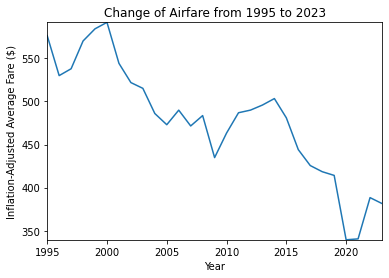

In [133]:
x = df1.loc[:, ["Year"]]

y = df1.loc[:, ["Inflation-Adjusted (2023 constant dollars) Average Fare ($)"]]


def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y, ax, 'Change of Airfare from 1995 to 2023',"Year", 'Inflation-Adjusted Average Fare ($)')

## Figure analysis

Here, we can see a general trend of the ticket prices **going down**. In more detail, this decrease also entails some “dips” and sharp increases. The dips can be seen in the years 2008-2009, which at first glance, looks like a recession-related decrease. Additionally, we can see a dip in prices in the years 2020 and 2021, which is a decrease that alludes to thinking of COVID 19. Although the recession and COVID 19 are well-known events, it’s important to think in more detail about what the decrease in airfare might have been due to:

***1)<u> Recession:***</u> we could ask ourselves a question of whether the decrease in prices we see is due to a reduction in the number of  flights averaged over the year (with no reduction in the actual prices of tickets), or wehther the number of flights was almost maintained but airlines had to cut the price to match the reduced income that many people were experincing due to layoffs. If the answer is that flight ticket prices stayed the same but the annual average ticekt price went down becuase of a reduced number of flights, then we can't really say that prices were any **less expensive** during the recession than in any other year. 

***2) <u>COVID 19:***</u> although the figure shows extremely low prices for tickets during the pandamic, it's actually not true that prices went down. This [article](https://www.traveldailymedia.com/airlines-in-the-united-states-report-record-profits/) explains how prices increased around 43% in 2021 due to COVID because of how **rare** flights were when there were restrictions on entry and exit for most countries. Despite this increase in prices, the reason we see a sharp decrease in prices is because this increase in prices didn't compensate for the thousands of flights that were cancelled, so in **average** terms, the prices seem to decrease. Simialiry, the sharp increase in prices we see in the figure starting from 2022 could be that prices are increaseing or it could be that it's just many more people that are trying to fly after they were locked up for a year or two. Therefore, it's both the sharp decrease and the sharp increase that follows that can't be looked at in general terms of in isolation. 

Other than the three rises and dips, if we were to average the sharp dips with the sharp rises, we would more or less get a smooth, almost linear decrease of prices over time - we'll use a scatter plot and do a regression to calculate correlation coefficient. Before that, let's try and plot the time series plot we had above with y-axis margins that start from zero (to better understand the scale of the decrease) 

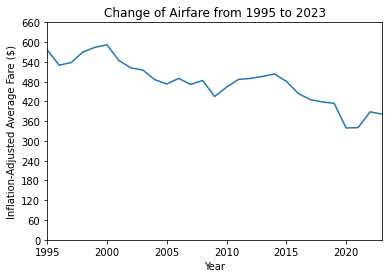

In [134]:
x = df1.loc[:, ["Year"]]

y = df1.loc[:, ["Inflation-Adjusted (2023 constant dollars) Average Fare ($)"]]


def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y, ax, 'Change of Airfare from 1995 to 2023',"Year", 'Inflation-Adjusted Average Fare ($)')
ax.set_yticks(np.arange(0,700,60))

From looking at the graph, we can see the importance of the **y-axis scale** and how the values look more like a **constant line** instead of a steep **negatively-sloped** line. With such a scale, one could be less certain abou he significance of the decrease in prices over time. Nonetheless, we could still plot this as a scatter plot and get the correlation coefficient​.

[-7.01802728e+00  1.45779690e+04]


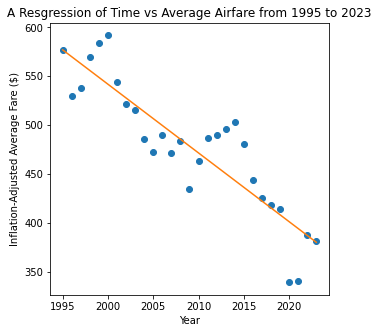

In [135]:
x = df1.loc[:, "Year"]
y = df1.loc[:32, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)"] ##we're exludigng the year 2023 

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("A Resgression of Time vs Average Airfare from 1995 to 2023")
plt.xlabel("Year")
plt.ylabel("Inflation-Adjusted Average Fare ($)")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline

print(slope_intercept_trendline)


The slope here is -7 and the y-intercept is 1.4577e+4 in the scientific notation, which is 14 577 dollars. 

In the figure above, we've included 2023. However, we decided not to in the begging, since we only have a quarterly report from it, not an annual one. We'll go ahead and repeat the scatter but this one **without the year 2023**, and we'll see what changes.

[-7.02639192e+00  1.45947317e+04]


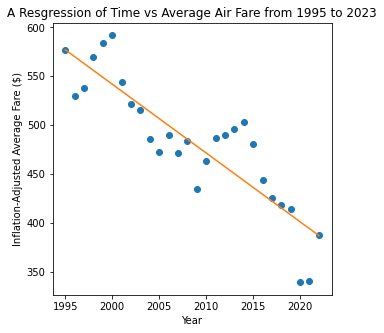

In [136]:
x = df1.loc[:31, "Year"]
y = df1.loc[:31, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)"] ##we're exludigng the year 2023 

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("A Resgression of Time vs Average Air Fare from 1995 to 2023")
plt.xlabel("Year")
plt.ylabel("Inflation-Adjusted Average Fare ($)")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline
#ax.set_yticks(np.arange(0,800,100))
#printing the slope and intercept
print(slope_intercept_trendline)


Notice also that the slope didn't change significantly (it became a little bit more negative as it went from -7.018 to -7.026) and that's because th 2023 average air fare value was more positive than thant of 2020, so when one "more" positive value was omitted (the 2023 one), the "more" negative 2020 value got to be weighted more heavily. Although the slope isn't affected much, out of completeness, it's better not to include 2023 even if didn't affect the slope. Other derived infomration/analysis might be affected later on, and we want to avoid that. megative correlation between the year and the inflation adjusted average 

## Descriptive analysis 

Let's go ahead and do some descriptive analysis on the max, min, and average. Ususally it's a first step to analyze these numbers first but since our dataset is small and we were concered of the general trend first, it's more useful to do the **descriptive analysis** now than in the begingging. 


In [137]:
df1.describe()

,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
count,29.000,29.000,28.000,28.000,29.000,28.000,28.000
mean,2009.000,478.752,-1.275,-17.539,334.362,1.210,14.949
std,8.515,67.322,6.150,11.423,32.834,7.288,11.089
min,1995.000,339.470,-18.040,-41.100,276.628,-17.029,-5.326
25%,2002.000,434.864,-4.229,-24.950,309.170,-2.729,6.113
50%,2009.000,486.029,-1.155,-15.880,328.548,0.938,13.734
75%,2016.000,521.907,1.756,-10.317,354.555,4.812,22.140
max,2023.000,591.797,14.058,2.679,396.397,23.185,35.665


Looking at the summary teble above, I'm fosucing on the **min, max and average** of the values. The min value probably corresponds to 2020 (from the graph). Since the year 2020 is a  considerably "different" value (it's almost the odd one out with its low value) let's see what the minimum would be if we excluded it.


In [138]:
df1.nsmallest(3, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
29,2020,339.470,-18.040,-41.100,292.262,-17.029,0.025
30,2021,340.539,0.315,-40.915,306.957,5.028,5.054
32,2023,381.554,-1.765,-33.799,381.554,0.907,30.585


As the plot showed earlier, 2020 is the year with the smallest average fare. I picked min 3 expecting the first and second ones to be 2020 and 2021. However, since the third one corresponds to the value for 2023, we'll go ahead ad find the smallest 4, since we've initally exlucded 2023.

In [139]:
df1.nsmallest(4, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
29,2020,339.470,-18.040,-41.100,292.262,-17.029,0.025
30,2021,340.539,0.315,-40.915,306.957,5.028,5.054
32,2023,381.554,-1.765,-33.799,381.554,0.907,30.585
31,2022,388.411,14.058,-32.609,378.126,23.185,29.412


From the 4 values above, we can see that the min value after the exceptionally low values of 2020 and 2021 corresponds to the year 2022, averaging at 388 dollars. Let's check the top 4 largest values as well


In [140]:
df1.nlargest(4, "Inflation-Adjusted (2023 constant dollars) Average Fare ($)")


,Year,Inflation-Adjusted (2023 constant dollars) Average Fare ($),Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year,Inflation-Adjusted (2023 constant dollars) Percent Change Cumulative from 1995,Unadjusted (current dollars) Average Fare,Unadjusted (current dollars) Percent Change From Previous Year,Unadjusted (current dollars) Percent Change Cumulative from 1995
9,2000,591.797,1.280,2.679,338.996,4.685,16.020
8,1999,584.316,2.477,1.381,323.826,4.740,10.828
4,1995,576.354,NaN,NaN,292.189,NaN,NaN
7,1998,570.192,5.991,-1.069,309.170,7.642,5.812


## Percent change over time 

It could be useful to plot the **rate** at which these price changes happened. It's true that the plot above shows that graphically but let's plot the percent change. We have two colomuns with percent change information:

1. ***Percent change since 1995:*** if plotted as a trendline or if plotted as a scatter plot, both plots will have exactly the same spikes and declines at the exact same places, since the change is cumaltive (won't add more to our knowledge than the plots we already have)
2. ***Percent change from previous year:*** will still have the same spikes and declines but will give us new estimates of the difference between differnet years' increases or decreases in airfare.

Consequently, we'll go ahead and plot a line graph of the "Percent Change From Previous Year" column, against the year.

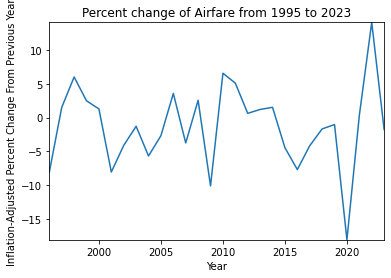

In [141]:
x = df1.loc[:, ["Year"]]

y = df1.loc[:, ["Inflation-Adjusted (2023 constant dollars) Percent Change From Previous Year"]]

#print(slope_intercept_trendline)

def plot(x, y, ax, title, x_label, y_label):
   ax.set_title(title)
   ax.set_ylabel(y_label)
   ax.set_xlabel(x_label)
   ax.plot(x, y)
   ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y, ax, 'Percent change of Airfare from 1995 to 2023',"Year", 'Inflation-Adjusted Percent Change From Previous Year')

Although some trends present in this plot are seen in the previous one (like the dips due to the recession/COVID and the sharp increase after COVID), what this plot highlights is what "jumps" are the most significant (which two consecutive years experienced the biggest airfare changes). Therefore, what this figure is helpful for is to see how while the prices during COVID were the lowest, the year 2021 experienced the biggest relative increase in prices. Other than that, the relatively smaller changes in price could also be interesting to look that. One of economic-elements that might be correlated with such airfare trends might be the GDP (although it's unlikely that GDP is the cause for these changes, since it's the costs and revenues of  airlines that dictates prices, not how the GDP, nationally, looks like). For that, we'll go ahead and do a **GDP analysis**, using a new dataset from this source https://www.statista.com/statistics/188105/annual-gdp-of-the-united-states-since-1990/


In [142]:
df_GDP = pd.read_excel('us-annual-gdp-all.xlsx')

#deleting first 5 rows
df_GDP=df_GDP.drop(df_GDP.index[[0,1,2,3]])

#deleting first column
df_GDP = df_GDP.drop(df_GDP.columns[0], axis=1)

#renaming the columns 
df_GDP.columns = ['U.S. annual GDP in billion current U.S. dollars']

df_GDP.head()

,U.S. annual GDP in billion current U.S. dollars
4,7639.700
5,8073.100
6,8577.600
7,9062.800
8,9631.200


In [143]:
#checking data types
df_GDP.dtypes

U.S. annual GDP in billion current U.S. dollars    float64
dtype: object

To plot the airfare against the GDP, we need to have both of those in the same dataframe. Since each one of them is in a different table right now, we need to use the concatentate function and merge them together. However, for that concatenated table, we need to use the **unadjusted** airfare prices becuase we're going to be comparing the fares to the actual GDP that year, and not current monetary considerations of value.  

In [144]:
#combining both dataframes 
df_combined= pd.concat([df1, df_GDP], axis=1)

#creating a pivot table of columns of interest
pivot_table_combined = pd.pivot_table(df_combined, values=['Unadjusted (current dollars) Average Fare',
                                                           'U.S. annual GDP in billion current U.S. dollars'],
                                      index=['Year'])
pivot_table_combined.head()

,U.S. annual GDP in billion current U.S. dollars,Unadjusted (current dollars) Average Fare
Year,,
1995,7639.700,292.189
1996,8073.100,276.628
1997,8577.600,287.222
1998,9062.800,309.170
1999,9631.200,323.826


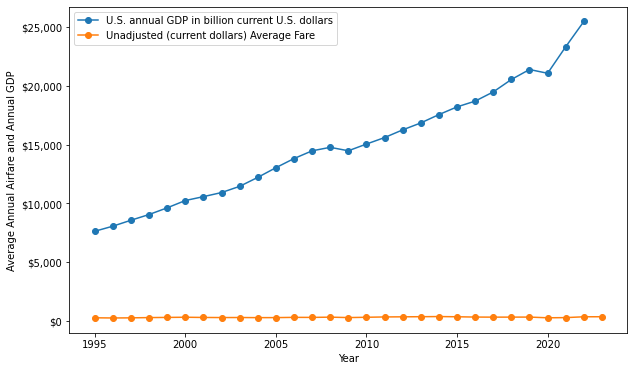

In [145]:
#plotting a time-series plot
ax = pivot_table_combined.plot(ylabel = 'Average Annual Airfare and Annual GDP',figsize = (10,6),marker='o')
ax.yaxis.set_major_formatter('${x:,.0f}')

Here, since the scale of the y-values for the GDP and the annual fare doesn't allow for a clear visuluzation of trends for airfare, we should either create a new pivot table with values of GDP being tens or 100s of billions instead of just billions, or we can have 2 sub-plots, one that shows the trends for the GDP and one that shows the trends we show with airefare. 

Since GDP values won't give us an explanation for the airfare trends (the causal relationship should be between expenses that airlines are experiencing or a different profit portoflio, which might be correlated with a trend of GDP of the American economy but won't likely be caused by it) , we'll just plot the **unadjusted airfare** once since we didn't before, and find the correlation between GDP and airfare.

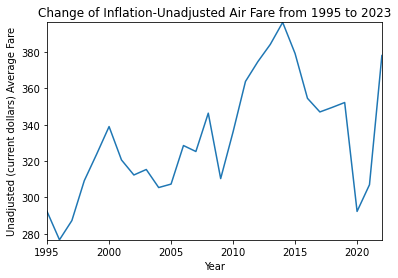

In [146]:
x = df_combined.loc[:31, "Year"]
y = df_combined.loc[:31, "Unadjusted (current dollars) Average Fare"] 

def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y, ax, 'Change of Inflation-Unadjusted Air Fare from 1995 to 2023',"Year", 'Unadjusted (current dollars) Average Fare')

Here, we can see that **prices go up** when we consider inflation-unadjusted air fare. However, having this upward trend be more aligned with my preassumptions about airfare increasing over time doesn't mean it's the correct y-variable to use. We still have to consider the inflation in order to asses how **"pricey"** the tickets were back in 2000 or 2010. It's only when comparing to the trend of the GDP accross the years that we should consider the inflation-unadjusted values.

Considering the upwards trend of both GDP and inflation-unadjusted airfare, let's look at the **correlation** between the two. To do that, let's plto a scatterplot with an x-axis of GDP and a y-axis of inflation-unadjusted air fare

[3.67819634e-03 2.77710835e+02]


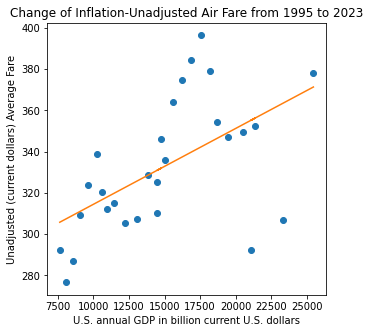

In [147]:
x = df_combined.loc[:31, "U.S. annual GDP in billion current U.S. dollars"]
y = df_combined.loc[:31, "Unadjusted (current dollars) Average Fare"]

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("Change of Inflation-Unadjusted Air Fare from 1995 to 2023")
plt.xlabel("U.S. annual GDP in billion current U.S. dollars")
plt.ylabel("Unadjusted (current dollars) Average Fare")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline

#printing the slope and intercept
print(slope_intercept_trendline)

Plotting a scatterplot with a y-axis that starts with zero

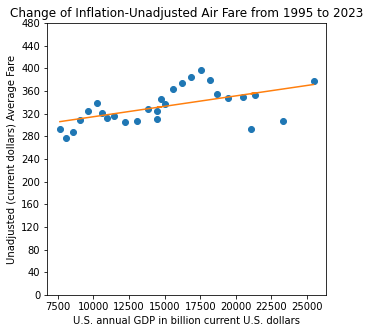

In [148]:
x = df_combined.loc[:31, "U.S. annual GDP in billion current U.S. dollars"]
y = df_combined.loc[:31, "Unadjusted (current dollars) Average Fare"]

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
plt.plot(x,y,'o')
plt.title ("Change of Inflation-Unadjusted Air Fare from 1995 to 2023")
plt.xlabel("U.S. annual GDP in billion current U.S. dollars")
plt.ylabel("Unadjusted (current dollars) Average Fare")

slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline
ax.set_yticks(np.arange(0,500,40))#Starting the y-axis with zero

Finding the correlation between the two axes

In [149]:
df_combined['U.S. annual GDP in billion current U.S. dollars'].corr(df_combined['Unadjusted (current dollars) Average Fare'])

0.5549619062494436

A correlation of 0.55 tells us that the rise in GDP and the rise of inflation-unadjusted aire fare isn't entriely random. However, this is still not considered a strong relationship, and since it's not R-squared, this isn't an explanatory relationship where x explains the trend in y. Even if we did calculate the correlation, it makes sense that the incrase of GDP could be entirely not related to an increase of GDP in the airline sector, and GDP isn't what causes flights prices to increase or decrease. Therefore, this GDP vs airefare analysis was completely exploratory and not explaintory. 

## Conclusion about price trend over the years 

Other than noticing that the biggest fare corresponds to the year 2000, if we were to ignore this fare (which is 591), we'll be talking about a 200 dollar difference between the second largest value and the third smallest value. Monetarily speaking, 200 dollars isn't actually a big diffrence if it's a difference obtained in 29 years. Another way to look at it is that the lowest average, which we're considering an excpetional low record due to COVID, is only about 130 dollar difference from the average 

However, to assess whether the decrease in prices is significant or not, it's useful to look at the decrease in terms of a percentage decrease of original price. Assuming that the origial price happens in 1995 and that the latest price happens in 2022, we can calcualte the percentage decrease using: (original price - latest price) / original price x 100%



In [150]:
original_price = 576.354107
latest_price = 388.410863
subtraction = original_price - latest_price
division = (subtraction/original_price)*100

print (division)

32.60898841829542


So from 1995 to 2022, we have ~ 33% price decrease. Although we're not doing any hypothesis testing, I consider this to be a significant decrase and  will go ahead and consider the general trend of airfare is one where prices of tickets decrease (on an annual level, nationally in the US). However, as we discussed earlier, this doesn't necissarily mean that prices of the tickets decreased for each of the years since 1995, but it could mean that **"there were factors that influenced the annual average to decrease"**, which puts the correct emphasis on factors such as the number of flights that end up flying, etc.

## Looking at it in another way: quarterly analysis

Since this 33% decrease is only a decrase in **average prices** throughout the years, it doesn't tell us much about times of the year where prices are more expeinsve - since I booked mine in the summer, maybe let's try to look at quartile information. Maybe I was right about having **summer** tickets be the most expensive they've ever been until now, but that isn't applicable for **annual averages**. 

Let's first look at the domestic flights for all 4 quarters first. We'll be importing a new dataset found at the same link as the first dataset (all part of the Bureau of Transportation Statistics)

In [151]:
df2 = pd.read_excel('Quarterly national level domestic average fare  series.xlsx')
df2.head()

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,1,296.896,591.591
1,1995,2,296.463,585.553
2,1995,3,287.515,565.404
3,1995,4,287.776,563.216
4,1996,1,283.970,550.746


From looking at the table we can see that the titles are correct and that data seems to be organized well. However, let's check that we have all he values. We're supposed to have 4 quarters for each year, and we have 29 years ((2023-1995) +1). 

In [152]:
number_of_rows = 29*4
print(number_of_rows)

116


In [153]:
len(df2)

113

The 3 missing rows tell us that we only have Q1 for 2023, which makes sense. Let's check that in the table:

In [154]:
df2.nlargest(4, "Year")


,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
112,2023,1,381.554,381.554
108,2022,1,328.493,347.561
109,2022,2,397.161,408.079
110,2022,3,382.540,387.956


As we can see from the largest value by year, we only have one quarter for 2023.

Now let's check the **data types**.

In [155]:
df2.dtypes


Year                                      int64
Quarter                                   int64
U.S. Average (Current $)                float64
U.S. Average (Inflation-Adjusted $)     float64
dtype: object

The data types don't need any changing.

Now let's start organizing all the years by quarters (all the values of air fare for Q1, all the values or air fare for Q2, etc.)

In [156]:
grouped_quarters = df2.groupby(["Quarter"])

# Showing only 3 decimals for all float numbers
pd.options.display.float_format = '{:.3f}'.format

grouped_quarters.agg(np.mean)

,Year,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
Quarter,,,
1,2009.000,333.174,483.685
2,2008.500,334.319,484.761
3,2008.500,328.578,473.855
4,2008.500,332.188,478.260



Looking at the U.S. Average (Inflation-Adjusted $) column that is organized by quarter, above, we can see that the average airfare per quarter is **almost even** across all 4 quarters, and is also very similar to the average of the average annual airfare with was 479 dollars. A more insightful analysis would be one where we know the highest quarterly price and the lowest one, and the trend of the same quarter over the years. However, we won't be doing that now.

Instead, let's start with the machine learning model that explores differences between airfare of airports. Maybe we'll find a significant difference between the airports instead of finding one in relation to quarters. 


## Machine Learning 

Let's shift gears and try to map the dataset into a machine learning model that can predict the price of a flight in 2023. For that, we'll import another dataset that has airfare organized by airport. The information needed for making a machine learning model might be a little more than what we have in the dataset, but we'll measure the performance of the model to decide its utility. 

In [157]:
df3 = pd.read_csv('Airfares_by_airport.csv')
df3.head()

,Average Domestic Air Fares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Chicago O'Hare - IL (Current $),Chicago O'Hare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Current $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Current $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,296.9,591.59,340.25,677.98,366.89,731.06,358.01,713.36
3,1995,2,296.46,585.55,346.03,683.46,377.5,745.61,366.31,723.51
4,1995,3,287.51,565.4,353.43,695.03,379.86,747,355.9,699.88


## Changes to make

1) Need to rename the columns 
2) Need to delete the first 2 rows
3) Need to delete the non-inflation-adjusted columns

In [158]:
df3_cleaned=df3.drop(df.index[[0,1]])

df3_cleaned.columns = ['Year',
               'Quarter',
               'U.S. Average (Current $)',
               'U.S. Average (Inflation-Adjusted $)',
               'Chicago OHare -  IL (Current $)',
               'Chicago OHare -  IL (Inflation-Adjusted $)',
               'Newark-Liberty -  NJ (Current $)',
               'Newark-Liberty -  NJ (Inflation-Adjusted $)',
               'San Francisco -  CA (Current $)',
               'San Francisco -  CA (Inflation-Adjusted $)']
              

df3_cleaned.head()

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Chicago OHare - IL (Current $),Chicago OHare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Current $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Current $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,296.9,591.59,340.25,677.98,366.89,731.06,358.01,713.36
3,1995,2,296.46,585.55,346.03,683.46,377.5,745.61,366.31,723.51
4,1995,3,287.51,565.4,353.43,695.03,379.86,747,355.9,699.88
5,1995,4,287.78,563.22,351.12,687.19,380.4,744.49,352.65,690.18
6,1996,1,283.97,550.75,339.02,657.51,358.62,695.53,349,676.87


In [159]:
df4_cleaned = df3_cleaned.drop(['U.S. Average (Current $)',
                  'Chicago OHare -  IL (Current $)', 
                  'Newark-Liberty -  NJ (Current $)',
                  'San Francisco -  CA (Current $)'], axis=1)
df_airports_analysis = df4_cleaned.drop([115,116,117])
df_airports_analysis.head()

,Year,Quarter,U.S. Average (Inflation-Adjusted $),Chicago OHare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Inflation-Adjusted $)
2,1995,1,591.59,677.98,731.06,713.36
3,1995,2,585.55,683.46,745.61,723.51
4,1995,3,565.4,695.03,747,699.88
5,1995,4,563.22,687.19,744.49,690.18
6,1996,1,550.75,657.51,695.53,676.87


Let's check the data types:

In [160]:
df_airports_analysis.dtypes

Year                                           object
Quarter                                        object
U.S. Average (Inflation-Adjusted $)            object
Chicago OHare -  IL (Inflation-Adjusted $)     object
Newark-Liberty -  NJ (Inflation-Adjusted $)    object
San Francisco -  CA (Inflation-Adjusted $)     object
dtype: object

Need to change the datatype from object to integer for "Year" column and float for the otheres 

In [161]:
df_airports_analysis[[ "Year",
                      "Quarter",
                      "U.S. Average (Inflation-Adjusted $)",
                      "Chicago OHare -  IL (Inflation-Adjusted $)",
                      "Newark-Liberty -  NJ (Inflation-Adjusted $)",
                      "San Francisco -  CA (Inflation-Adjusted $)"
                     ]] = df_airports_analysis[["Year",
                                                "Quarter",
                                                "U.S. Average (Inflation-Adjusted $)",
                                                "Chicago OHare -  IL (Inflation-Adjusted $)",
                                                "Newark-Liberty -  NJ (Inflation-Adjusted $)",
                                                "San Francisco -  CA (Inflation-Adjusted $)"]].apply(pd.to_numeric)

df_airports_analysis.dtypes

Year                                             int64
Quarter                                          int64
U.S. Average (Inflation-Adjusted $)            float64
Chicago OHare -  IL (Inflation-Adjusted $)     float64
Newark-Liberty -  NJ (Inflation-Adjusted $)    float64
San Francisco -  CA (Inflation-Adjusted $)     float64
dtype: object

## Visualizing the table using a time series plot by using a pivot table 

,Chicago OHare - IL (Inflation-Adjusted $),Newark-Liberty - NJ (Inflation-Adjusted $),San Francisco - CA (Inflation-Adjusted $),U.S. Average (Inflation-Adjusted $)
Year,,,,
1995,685.915,742.040,706.732,576.440
1996,657.628,696.775,670.495,530.605
1997,689.357,739.138,686.178,537.658
1998,701.620,734.615,718.567,570.270
1999,710.178,757.755,744.783,584.947
2000,714.670,784.913,788.888,591.888
2001,631.505,710.418,737.572,543.007
2002,566.048,667.337,703.003,522.332
2003,556.263,666.600,701.470,515.477


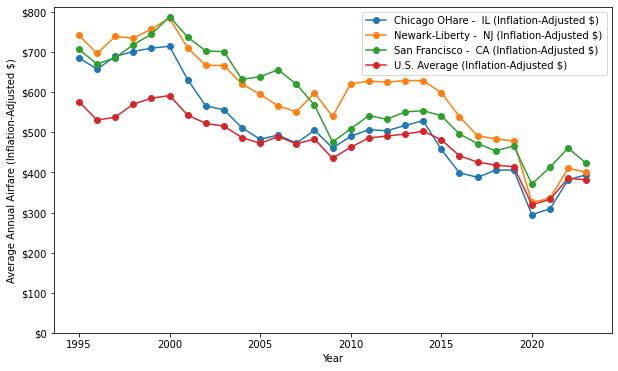

In [162]:
#creating a pivot table
pivot_table = pd.pivot_table(df_airports_analysis,
                                 values=['U.S. Average (Inflation-Adjusted $)','Chicago OHare -  IL (Inflation-Adjusted $)','Newark-Liberty -  NJ (Inflation-Adjusted $)','San Francisco -  CA (Inflation-Adjusted $)'],
                                 index=['Year'], aggfunc='mean')
display(pivot_table)

#plotting a time-series plot
ax = pivot_table.plot(ylabel = 'Average Annual Airfare (Inflation-Adjusted $)',figsize = (10,6),marker='o')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_yticks(np.arange(0,900,100)) # setting the ticks so that y-axis starts with zero

In the pibot table, we took the average of the average quarterly fair, to create an average annual.
This table could show different numbers since flights grouped by airport will have both domestic and international flights, not only domestic ones. 

***Intersting trends seen in plot:***
- Both Newark and San Franciso altenrate in which airport has the most expenisive flights, which is suprising because one would expect San Francisco or Chicago's airport to be the most expensive.
- Generally, whenever there is an annual decrease or increase, all three airports follow a simialr trend.
- San Franciso airport expiernced more drastic price fluctuations, and is the most expensive airport after COVID. 

Now, to make the dataset ready to do supervised learning on, we need to use the dataset as its organized in another way. The new dataset should have "Airport" as a dummy variable (with **one-hot-encoding**), and another column that has the values of the airfare for each of these airports.

In [163]:
df_airports_dummy= pd.read_excel('Airfare_airport_dummy.xls')
df_airports_dummy.head()

,Year,Quarter 1,Quarter 2,Quarter 3,Quarter 4,U.S. Average (Inflation-Adjusted $),Chicago Ohare - IL,Newark-Liberty - NJ,San Francisco - CA,Airport Quarterly Average Airfare
0,1995,1,0,0,0,591.590,1,0,0,677.980
1,1995,1,0,0,0,591.590,0,1,0,731.060
2,1995,1,0,0,0,591.590,0,0,1,713.360
3,1995,0,1,0,0,585.550,1,0,0,683.460
4,1995,0,1,0,0,585.550,0,1,0,745.610


In this table, instead of making a column called 'Quarter' and a column called 'Airport' and having each airport represent a number, since there is no particular wieght or importance placed on any particular quarter or airport, there is no need for the San Franciso airport to have the number 3 allocated to it, while the chicago airport be allocated the number 1 (same applies for quarters).That is why the **one-hot encoding ** method used was used in the table.

We'll use the table above to do a supervised linear regression model, and an important element of this linear model is that we make sure our data is **actually** linear (and not exponential, logarithmic, etc.). For this, the time-serires plot comes in handy, as it shows that the data likely follows a linear function.

Now, we'll have to split this same dataset into one that would be allocated for training the supervised machine learning model, one for testing the model, and one for validating it. 

In [164]:
#assinging a different length for each dataset (training,validation and testing)
train, val, test = np.split(df_airports_dummy.sample(frac=1), [int(0.6*len(df_airports_dummy)), int(0.8*len(df_airports_dummy))])

#function to get the x and y variables
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe) #copying from main dataset
  if x_labels is None: #if we want all the columns to pass as x
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1) #reshaping to make the array 2-D
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y)) #stacking the y-variables horizontally one next to the other 
    
  return data, X, y

In [165]:
#using the function and assigning the x and y variables for our model
_, X_train_year, y_train_year = get_xy(train, "Airport Quarterly Average Airfare", x_labels=["Year"])
_, X_val_year, y_val_year = get_xy(val, "Airport Quarterly Average Airfare", x_labels=["Year"])
_, X_test_year, y_test_year = get_xy(test, "Airport Quarterly Average Airfare", x_labels=["Year"])

In [166]:
y_train_year


array([[521.18],
       [480.63],
       [394.33],
       [304.25],
       [392.82],
       [775.42],
       [711.17],
       [581.2 ],
       [619.98],
       [662.98],
       [557.94],
       [690.31],
       [447.36],
       [536.09],
       [468.33],
       [787.58],
       [572.87],
       [492.45],
       [615.62],
       [676.87],
       [479.23],
       [604.09],
       [614.72],
       [535.41],
       [471.22],
       [365.93],
       [390.66],
       [352.92],
       [639.33],
       [764.65],
       [513.83],
       [645.33],
       [438.48],
       [428.41],
       [475.92],
       [679.3 ],
       [630.13],
       [504.98],
       [564.5 ],
       [442.33],
       [563.31],
       [702.5 ],
       [669.21],
       [485.2 ],
       [260.89],
       [481.68],
       [723.51],
       [665.09],
       [470.17],
       [530.71],
       [699.12],
       [499.95],
       [509.6 ],
       [616.73],
       [421.99],
       [433.43],
       [512.26],
       [242.25],
       [605.06

Before we start with our linear model, it's important to point out:

1) How big our training dataset is important
2) How many attributes we have is important
3) single vs multiple regression model

For the first two questions, we could do a learning curve that tests the errors in prediction as our number of data points increaes. Sometimes having a big dataset with a lot of attributes makes it difficult to recognize the patterns, at the same time, we want to have enough data to allow the model to be a specific-enough one.

Of course, there are many other factors that would determine the qualtiy of the data acquired, regardless of the quality of the model or the low number of errors resulted.

We'll try single regression:


In [167]:
#creating a linear regression model and feeding the x and y variables in it
average_fare_reg = LinearRegression()
average_fare_reg.fit(X_train_year, y_train_year)

LinearRegression()

In [168]:
#getting slope and intercept of the line of best fit of regression
print(average_fare_reg.coef_,average_fare_reg.intercept_)

[[-12.60348942]] [25885.66429878]


In [169]:
#getting R-squared
average_fare_reg.score(X_test_year, y_test_year)

0.7098244654924825

This R-squared is telling us that 70% of the relationship between the x-variable "Year" and the y-variable "Quarterly Average Fare" of each airport is explained by the x-variable, "Year".  

Now let's plot this linear regression model 

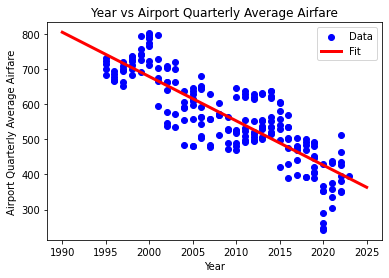

In [170]:
plt.scatter(X_train_year, y_train_year, label="Data", color="blue")
x = tf.linspace(1990, 2025, 10)
plt.plot(x, average_fare_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Year vs Airport Quarterly Average Airfare")
plt.ylabel("Airport Quarterly Average Airfare")
plt.xlabel("Year")
plt.show()

## Multiple linear regression

Let's see if the results will have a smaller Mean Squared Error


In [171]:
train, val, test = np.split(df_airports_dummy.sample(frac=1), [int(0.6*len(df_airports_dummy)),
                                                               int(0.8*len(df_airports_dummy))])
_, X_train_all, y_train_all = get_xy(train, "Airport Quarterly Average Airfare", x_labels=df_airports_dummy.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "Airport Quarterly Average Airfare", x_labels=df_airports_dummy.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "Airport Quarterly Average Airfare", x_labels=df_airports_dummy.columns[1:])

In [172]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [173]:
#getting R-squared
all_reg.score(X_test_all, y_test_all)

1.0

Having a higher R-squared is normally an indication of a smaller unexplained error in the data, but it's still not a sign that we necessarily have the right model. Additionally, having an R-squared of 1 is potentially a bad sign and not a good one becuase there is no model that can fit the values 100% 

In [174]:
y_pred_lr = all_reg.predict(X_test_all)

We won't be able to plot this the same way we did above becase the x variables aren't the same number as the y variables 

In [175]:
y_pred_lr

array([[663.15],
       [694.25],
       [455.4 ],
       [531.36],
       [564.5 ],
       [597.97],
       [697.5 ],
       [683.75],
       [268.21],
       [648.9 ],
       [557.94],
       [605.79],
       [594.82],
       [545.22],
       [538.7 ],
       [517.42],
       [570.97],
       [365.93],
       [503.54],
       [522.68],
       [651.96],
       [412.18],
       [537.16],
       [552.99],
       [522.21],
       [634.67],
       [260.89],
       [563.31],
       [498.32],
       [390.66],
       [558.8 ],
       [617.61],
       [560.57],
       [515.78],
       [567.95],
       [482.08],
       [778.32],
       [521.18],
       [558.18],
       [480.63],
       [536.09],
       [654.43],
       [722.93],
       [390.17],
       [512.26],
       [500.04],
       [433.43],
       [352.92],
       [677.98],
       [775.42],
       [695.27],
       [394.65],
       [708.1 ],
       [466.91],
       [490.45],
       [734.03],
       [502.38],
       [488.38],
       [426.13

## Alternate analysis

We could try to create a **Neural Net** trianing model that would map an input layer of data (our x-variables) into an ouput layer,  using an intermediate layer of nodes that outlines the hidden relationship between the x-variables and other variables that aren't present in the dataset, and that might be affecting our y-variable.

- Utility: this NN analysis fits our scenario because we don't have all the variables that impact the "Average Quarterly Airfare". There are variables like the airline, airline class, arrival city, duration of flight, etc. that could be impacting the quarterly airfare, but that aren't part of the attributes we have in our table. 

For understanding the performance quality of this NN model, we could look at the value loss of our model (the predictions that don't end up matching the acutal dataset) using a Mean Squared Error value. Mean Squared Error normally tells us how far (of a distance) our "real" dataset point is from that of the regression model.

For the purpose of keeping the project at the length it's in, I won't be doing this analysis. However, it's important to recognize its utility and that it could be used with our dataset.  


## Taking the project further 

It's important to recognize the limitations of this project and the methods it takes, and to think of alternatives to making it more advanced and helpful as a tool for implementation. This project can be taken further in the following ways:

***1) International flight information***: we ended the analysis with only considering US internal flights only, so scraping the internet using **APIs** for international flight information would be a more direct way of answering my question of whether my flight to Taiwan was actually expensive or not. I would also be able to access more information about the factors that are actually controlling the airfare and be able to feed them in my linear machine learning model.

***2) Would make the project interactive***: would make a web app where people can see the trends of airfare by airport (via a visulaization tool like Ploty) and be able to get recommendations on which days/airlines will be better to book flight in. However, since this feature is already present in some online booking services, a way I could go **beyond** the normal is by collecting data about factors that affect ticket prices that aren't as obvious to people such as the number of bags they're checking, booking premium economy from teh beginning vs booking economy and then paying for the upgrade when checking out, whether milages are better to use on this flight or on another, etc. - I'll give them a guide on their best money spending practices through a recommendation system. 

***3) Would make an industry-level analysis undersatnding the <u>profits</u> and trying to set a <u>price model</u>*** for different customer sub-groups and destinations: although I already think that the airline industry is a profitable one, it'll be interesting if I can land on a profit-maximizing method by doing a better job at market segmentation of customers. I'll feed more information into a machine learning model, and try to get at as much of a close model to the one airlines are currently using as I can (by testing different factors and assigning different machine learning models). If profit infromation isn't accessible, I'll try to get an estimate using their annual revenues and **estimated costs** (operating an aircraft, aircraft insurance, salaries for employees, sponsorships, etc. should be more or less standard costs across airlines and should be easily attainable). More advanced marketing costs will be difficult to know (such as sponsoring an Olumpics soccer game or paying for a well-knwon actor to feature in their saftey videos), but we can potentially taking these out according to how good of a job the other factors do in estimating the costs and revienue for airlines. A look at the **business model** for each airline will help place weigh different factors differentely, and that could be a human-made-decision on how a machine learning model should operate. 


